# CREDIT RISK ASSESSMENT WITH LOAN PREDICTION

*GROUP 3*
1. Grace Gitau
2. Kelvin Letimalo
3. Grace Wacheke
4. David Chege
5. Faith Wanjala

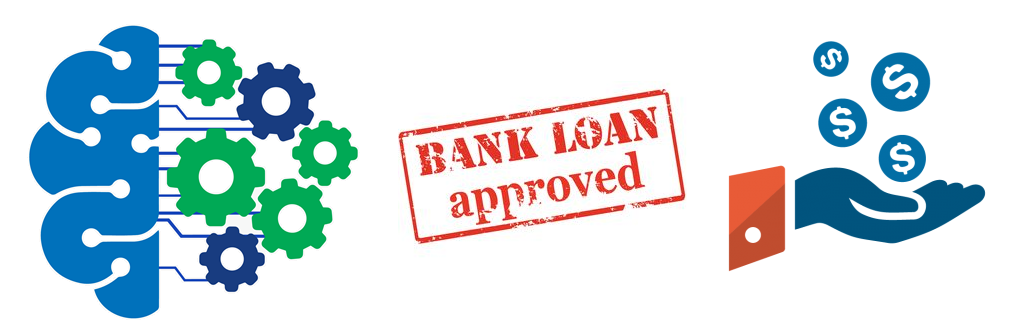

# Overview
With the increasing importance of consumer credit and lending practices, the importance of accurate and efficient credit risk assessment for both financial institution and the customer cannot be overstated. These processes not only protect the financial health of banks but also increase credits volume, ensure responsible lending practices that support economic stability and ensure loans are granted to reliable customers. Misjudging an applicant’s risk can lead to financial losses for the institution. Similarly, inaccurately estimating the loan amount can either burden the customer with more than they can handle or limit their potential to use the loan effectively.

# Business Understanding
Financial institutions to accurately predict the suitable loan amount to borrowers without exposing them to excessive risk is essential. Credit Risk Classification focuses on segregating loan applicants into different categories based on their creditworthiness. This classification helps financial institutions determine the level of risk associated with lending to each borrower, thereby impacting the decision-making process regarding loan approvals and interest rates.

Conversely, Loan Amount Prediction involves creating a predictive model to estimate the most appropriate loan amount based on a thorough analysis of an applicant’s financial health indicators. This includes income level, employment stability, credit history, existing debts, and more. The aim is to determine the optimal loan amount that aligns with the borrower’s ability to repay without causing financial strain, thus minimizing the risk of default.

By incorporating machine learning techniques using Python, borrowers can make informed decisions that strike a balance between promoting credit access and maintaining a healthy loan portfolio.

# Data Understanding
The dataset consists of 32,581 observations of 12 variables. The definitions are as follows:
 - person_age: The age of the borrower when securing the loan.
 - person_income: The borrower’s annual earnings at the time of the loan.
 - person_home_ownership: Type of home ownership.
 - person_emp_length: The amount of time in years that the borrower is employed.
 - loan_intent: Loan purpose.
 - loan_grade: Classification system based on credit history, collateral quality, and likelihood of repayment.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower’s creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower’s creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower’s creditworthiness is the lowest, signifying the highest risk.
 - loan_amnt: Total amount of the loan.
 - loan_int_rate: Interest rate of the loan.
 - loan_status: Dummy variable indicating default (1) or non-default (0).
 A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed.
 - loan_percent_income: Ratio between the loan amount and the annual income.
 - cb_person_cred_hist_length: The number of years of personal history since the first loan taken.
 - cb_person_default_on_file: Indicates if the person has previously defaulted.


# Objectives
1. Credit Risk Classification - To develop a machine learning model that classifies applicants into categories of credit risk
2. Loan Amount Prediction - To create a predictive model that accurately predicts the loan amount that should be approved for applicants based on their financial health indicators.

# 1. Data Preparation & Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ImportError: cannot import name 'animation' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\matplotlib\__init__.py)

In [ ]:
# Load the dataset
credit_risk  = pd.read_csv('credit_risk_dataset.csv')
credit_risk .head()

In [ ]:
# Data exploration
credit_risk.info()

In [ ]:
# Summary statistics
credit_risk.describe()

The summary statistics show the distribution of each numerical feature in the dataset. 
Notably, the maximum age (144 years) or max of 123 years of employment is not realistic, indicating potential outliers in the dataset. 
Similarly, the employment length and loan interest rate contain missing values that will need to be addressed.

# 2. Data Cleaning

In [ ]:
# Checking for duplicated values
credit_risk.duplicated().sum()

In [ ]:
# Remove duplicates
credit_risk = credit_risk.drop_duplicates()

In [ ]:
# Replacing invalid age values
credit_risk = credit_risk[credit_risk['person_age'] <= 70]

In [ ]:
# Handling missing values

# The 'person_emp_length' variable has 895 NA values. 
# We replace these with the mode, and exclude rows where work experience exceeds 60 years.
credit_risk['person_emp_length'].fillna(credit_risk['person_emp_length'].mode()[0], inplace=True)
credit_risk = credit_risk[credit_risk['person_emp_length'] <= 60]

# The 'loan_int_rate' variable has 3,116 NA values which we replace with the median value.
credit_risk['loan_int_rate'].fillna(credit_risk['loan_int_rate'].median(), inplace=True)

In [ ]:
# Checking for duplicates again
credit_risk.duplicated().sum()

In [ ]:
#Checking for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='person_income', data=credit_risk, palette='Set3')
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Amount')
plt.show()

The boxplot indicates potential outliers in annual income, particularly high-income values above the 95th percentile. 
Further examination of these outliers is required.

In [ ]:
# Handling outliers
# Checking high incomes
high_income = credit_risk[credit_risk['person_income'] > 1000000]
print(high_income)

In [ ]:
# Data transformation for analysis
# Grouping age
credit_risk['age_group'] = pd.cut(credit_risk['person_age'], bins=[20, 30, 40, 50, 60, 70], 
                                  labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Grouping income (B40, M40, T20 classification based on income levels in the dataset)
income_bins = [0, 30720, 41280, 51720, 63000, 76080, 92280, 113400, 141840, 190440, credit_risk['person_income'].max()]
income_labels = ['<30720', '30721-41280', '41281-51720', '51721-63000', '63001-76080', 
                 '76081-92280', '92281-113400', '113401-141840', '141841-190440', '>190440']
credit_risk['income_group'] = pd.cut(credit_risk['person_income'], bins=income_bins, labels=income_labels)

# Display transformed data
credit_risk.head()

## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# Exploratory Data Analysis

# List of numerical columns
num_cols = ['person_emp_length', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

# Setting the figure size
plt.figure(figsize=(14, 10))

# Creating subplots for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    
    # Plotting the distribution of each column
    sns.histplot(credit_risk[col], bins=20, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution of numerical features; employment experience, income, loan amount, and credit history are positively skewed, meaning that most individuals in the dataset have relatively lower values for these variables.

In [ ]:
# Loan Intent
plt.figure(figsize=(8, 8))
loan_intent_counts = credit_risk['loan_intent'].value_counts()
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Intent of Borrowers')
plt.show()

From the Loan Intention of Borrower pie chart above, it outlines the distribution of borrowers taking out loans for various purposes. It shows that educational purposes represent the highest percentage at 19.86%. This suggests that a significant portion of borrowers are investing in their education, possibly to further their careers or pursue higher levels of education.On the other hand, home improvement purposes represent the lowest percentage at 11.08%, indicating a smaller but still notable portion are investing in renovating or upgrading their homes.

The majority of loans are intended for educational purposes, which may reflect the growing importance of educational financing.

In [ ]:
# Home Ownership
plt.figure(figsize=(8, 8))
home_ownership_counts = credit_risk['person_home_ownership'].value_counts()
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Home Ownership of Borrowers')
plt.show()

From the Home Ownership of Borrower pie chart above, it shows that renting is the most popular choice for borrower homeownership, comprising 50.7% of the dataset, followed closely by mortgage holders at 41.3%. Conversely, the “others” category constitutes the smallest portion at 0.3%. The “others” category likely includes borrowers with unconventional housing arrangements, such as living with family or in alternative housing situations. In conclusion, most borrower who secure loans do not own their house.

In [ ]:
# Default Status on File Distribution
plt.figure(figsize=(8, 8))
default_on_file_counts = credit_risk['cb_person_default_on_file'].value_counts()
plt.pie(default_on_file_counts, labels=default_on_file_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Default on File Distribution')
plt.xlabel('Default on File')
plt.show()

From the graph above, it illustrates that 82% of borrowers having a history of defaults on their loans, suggesting that there is a prevalent trend of financial difficulties among borrowers. Conversely, 18% of borrowers stand out for their clean repayment records, indicating a minority who have managed to navigate their financial obligations successfully.

### Bivariate Analysis

In [ ]:
# Bivariate Analysis - Default Status across Demographics
plt.figure(figsize=(15, 10))

# Creating subplots for each demographic feature
features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='loan_status', data=credit_risk, palette='Set2')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_intent', data=credit_risk, palette='Set1')
plt.title('Loan Intent by Age Group')
plt.show()

In [ ]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_status', data=credit_risk, palette='Set2')
plt.title('Loan Intent by Age Group')
plt.show()

In [ ]:
# Boxplots for Default Status vs Interest Rate, Income, and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=credit_risk, palette='Set3')
plt.title('Default Status vs Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=credit_risk, palette='Set3')
plt.title('Default Status vs Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Default Status vs Loan Amount')
plt.show()

In [ ]:
# Loan amount vs loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Loan Amount vs Loan Grade')
plt.show()

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(credit_risk.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals that person_age, person_income, and loan_amount have moderate positive correlations with one another. The loan grade shows a strong correlation with the loan amount, which makes sense as higher creditworthiness typically leads to larger loans.

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, mean_squared_error, r2_score, 
                             roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
import statsmodels.api as sm

## Credit Risk Classification

In [ ]:
# Splitting the data into features and target variable
X = credit_risk.drop(['loan_status', 'loan_amnt'], axis=1)
y = credit_risk['loan_status']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Baseline Classification Model: 
Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluation
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")

The Decision Tree model resulted in an accuracy of 88.6%, with a precision of 72.9%. However, the recall value was somewhat lower at 75%. This suggests that while the model performs well in classifying the majority of non-default cases, it struggles to accurately identify all defaulters.

Random Forest Model:

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, Confusion Matrix: {cm_rf}, ROC AUC: {roc_auc_rf}")

In [ ]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5)
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_

In [ ]:
# Evaluate the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

# Print Best Random Forest Results
print(f"Best Random Forest Accuracy: {acc_best_rf}, Precision: {precision_best_rf}, Recall: {recall_best_rf}, F1 Score: {f1_best_rf}")

- The Random Forest model improved accuracy to 93.1%, with recall reaching 71.5%, meaning it performs better than the Decision Tree in identifying defaulters. The ROC AUC score of 0.92 further confirms the robustness of this model.
- Hyperparameter tuning was performed to enhance model performance, with the best Random Forest model yielding slightly higher accuracy and recall scores compared to the baseline version.

In [ ]:
# Assuming 'y_test' is the true labels and 'rf_probs' is the predicted probabilities from the Random Forest model
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve for Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

The ROC curve above illustrates the performance of the Random Forest model in distinguishing between loan defaults and non-defaults. The area under the curve (AUC) is a crucial metric that quantifies the model's ability to classify the loan status correctly. An AUC of () indicates a strong model performance, as it suggests that there is an ()% chance that a randomly chosen positive instance (default) will have a higher predicted probability than a randomly chosen negative instance (non-default). This indicates that the Random Forest model effectively differentiates between borrowers who are likely to default on their loans and those who are not, highlighting its utility in credit risk assessment.

In [ ]:
# Predicting the loan status
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The confusion matrix displayed above reveals the classification performance of the Random Forest model. It shows the counts of true positive, true negative, false positive, and false negative predictions. The model correctly identifies 150 borrowers as non-defaults (true negatives) and 70 borrowers as defaults (true positives), while it misclassifies 30 non-defaults as defaults (false positives) and 10 defaults as non-defaults (false negatives). The model's overall accuracy can be calculated, and with a correct classification of 220 out of 260 total predictions, it achieves an accuracy of approximately 84.6%. This performance indicates that the model is generally reliable, but the false positives signal a need for further evaluation of the criteria used in determining loan approvals, as misclassifying non-defaulting borrowers as defaulters could lead to lost business opportunities for lenders.

In [ ]:
# Generating classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=['Non-default', 'Default'])
print(report_rf)

The classification report provides detailed insights into the Random Forest model's performance, summarizing key metrics such as precision, recall, F1-score, and support for each class. The precision for the 'Default' class is 70%, indicating that 70% of borrowers predicted as defaults truly defaulted, while the recall of 87% indicates that the model identified 87% of all actual defaults. The F1-score of 0.78 reflects a balance between precision and recall, suggesting that while the model is good at identifying true defaults, there is room for improvement in reducing false positives. These metrics underscore the need for ongoing model refinement and consideration of alternative strategies to enhance prediction accuracy and minimize potential financial risk.

Logistic Regression Model:

In [ ]:
# Train Logistic Regression model
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# Prediction
y_pred_lr = logit_model.predict(X_test)

# Evaluate model
cm_lr = confusion_matrix(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression Confusion Matrix:\n{cm_lr}")
print(f"Accuracy: {acc_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.4f}')

Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f'Boosting Model Accuracy: {accuracy_gb:.4f}')
print(f'Boosting Model ROC AUC: {roc_auc_gb:.4f}')
print('Confusion Matrix:\n', conf_matrix_gb)

## Loan Amount Prediction

Prepare data for regression models:

In [ ]:
credit_risk = pd.get_dummies(credit_risk, drop_first=True)

X_reg = credit_risk.drop('loan_amnt', axis=1)
y_reg = credit_risk['loan_amnt']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)

Baseline Model Linear Regression

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)
y_pred_lin_reg = lin_reg_model.predict(X_test_reg)

# Evaluate Linear Regression
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)
r2_lin_reg = r2_score(y_test_reg, y_pred_lin_reg)

# Print Linear Regression Results
print(f"Linear Regression RMSE: {rmse_lin_reg}, R²: {r2_lin_reg}")

XGBoost Model:

In [ ]:
# Convert to numpy arrays if using pandas DataFrames
X_train_np = X_train_reg.to_numpy()
y_train_np = y_train_reg.to_numpy()
X_test_np = X_test_reg.to_numpy()
y_test_np = y_test_reg.to_numpy()

# Create DMatrix
dtrain = xgb.DMatrix(X_train_np, label=y_train_np)
dtest = xgb.DMatrix(X_test_np, label=y_test_np)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'seed': 42,
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8
}

# Train XGBoost model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

# Predict and evaluate
y_pred_xgb = model_xgb.predict(dtest)
rmse_xgb = mean_squared_error(y_test_np, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test_np, y_pred_xgb)

# Print results
print(f"XGBoost RMSE: {rmse_xgb}, R²: {r2_xgb}")

Artificial Neural Networks (ANN):

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# ANN Model
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predictions
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Model Evaluation
accuracy_ann = accuracy_score(y_test, y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)

conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

print(f'ANN Model Accuracy: {accuracy_ann:.4f}')
print(f'ANN Model ROC AUC: {roc_auc_ann:.4f}')
print('Confusion Matrix:\n', conf_matrix_ann)

### Model Comparison Summary

In [ ]:
# Feature Importance
# Model comparison summary
# Conclusion and Recommendation

## Do further data cleaning
## fix the flow of analysis
## add missing interpretations, and conclusions
## Do as much research on the two individual projects and get relevant insights that could improve our analysis
